In [57]:
import os
import pathlib
import numpy as np
import pandas as pd
from matplotlib import pyplot
from keras.datasets import cifar10


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


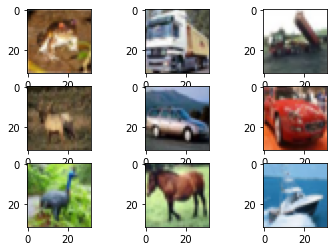

In [58]:
cifar10_label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()


In [59]:
#Getting the numpy data into lists.
def load_new_test_data(version_string='', load_tinyimage_indices=False):
    data_path = './data/'
    filename = 'cifar10.1'
    if version_string == '':
        version_string = 'v7'
    if version_string in ['v4', 'v6', 'v7']:
        filename += '_' + version_string
    else:
        raise ValueError('Unknown dataset version "{}".'.format(version_string))
    label_filename = filename + '_labels.npy'
    imagedata_filename = filename + '_data.npy'
    label_filepath = os.path.abspath(os.path.join(data_path, label_filename))
    imagedata_filepath = os.path.abspath(os.path.join(data_path, imagedata_filename))
    print('Loading labels from file {}'.format(label_filepath))
    assert pathlib.Path(label_filepath).is_file()
    labels = np.load(label_filepath)
    print('Loading image data from file {}'.format(imagedata_filepath))
    assert pathlib.Path(imagedata_filepath).is_file()
    imagedata = np.load(imagedata_filepath)
    assert len(labels.shape) == 1
    assert len(imagedata.shape) == 4
    assert labels.shape[0] == imagedata.shape[0]
    assert imagedata.shape[1] == 32
    assert imagedata.shape[2] == 32
    assert imagedata.shape[3] == 3
    if version_string == 'v6' or version_string == 'v7':
        assert labels.shape[0] == 2000
    elif version_string == 'v4':
        assert labels.shape[0] == 2021

    if not load_tinyimage_indices:
        return imagedata, labels
    else:
        ti_indices_data_path = os.path.join(os.path.dirname(__file__), './data/')
        ti_indices_filename = 'cifar10.1_' + version_string + '_ti_indices.json'
        ti_indices_filepath = os.path.abspath(os.path.join(ti_indices_data_path, ti_indices_filename))
        print('Loading Tiny Image indices from file {}'.format(ti_indices_filepath))
        assert pathlib.Path(ti_indices_filepath).is_file()
        with open(ti_indices_filepath, 'r') as f:
            tinyimage_indices = json.load(f)
        assert type(tinyimage_indices) is list
        assert len(tinyimage_indices) == labels.shape[0]
        return imagedata, labels, tinyimage_indices



In [60]:
images, labels = load_new_test_data('v4')

Loading labels from file C:\Users\Immanuel\py-env\aai\exam project\AAI_exam\datasets\cifar10.1_v4_labels.npy
Loading image data from file C:\Users\Immanuel\py-env\aai\exam project\AAI_exam\datasets\cifar10.1_v4_data.npy


In [61]:
#Finding the number of occurences for each class in the new dataset
classes = {  "airplane": 0,
          "automobile": 0,
          "bird": 0,
          "cat": 0,
          "deer": 0,
          "dog": 0,
          "frog": 0,
          "horse": 0,
          "ship": 0,
          "truck": 0
       }
for i in range(len(images)):
    for i2 in range(len(cifar10_label_names)):
        if i2 == labels[i]:
            classes[cifar10_label_names[i2]] = classes[cifar10_label_names[i2]] + 1
        
print(classes)

{'airplane': 208, 'automobile': 212, 'bird': 202, 'cat': 212, 'deer': 204, 'dog': 218, 'frog': 192, 'horse': 210, 'ship': 161, 'truck': 202}


In [62]:
#Finding the number of occurences for each class in the original dataset
classes = {  "airplane": 0,
          "automobile": 0,
          "bird": 0,
          "cat": 0,
          "deer": 0,
          "dog": 0,
          "frog": 0,
          "horse": 0,
          "ship": 0,
          "truck": 0
       }
for i in range(len(trainX)):
    for i2 in range(len(cifar10_label_names)):
        if i2 == trainy[i]:
            classes[cifar10_label_names[i2]] = classes[cifar10_label_names[i2]] + 1
    

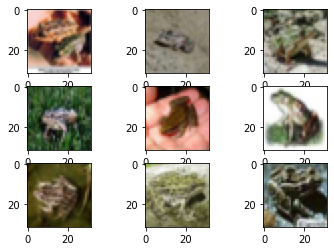

In [63]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(images[i])
# show the figure
pyplot.show()